In [63]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [6]:
file_name = 'troop_movements.csv'
data_frame = pd.read_csv(file_name)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   timestamp             1000 non-null   object
 1   unit_id               1000 non-null   int64 
 2   unit_type             1000 non-null   object
 3   empire_or_resistance  1000 non-null   object
 4   location_x            1000 non-null   int64 
 5   location_y            1000 non-null   int64 
 6   destination_x         1000 non-null   int64 
 7   destination_y         1000 non-null   int64 
 8   homeworld             1000 non-null   object
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [17]:
e_or_r_counts = data_frame.empire_or_resistance.value_counts()
e_or_r_df = pd.DataFrame(e_or_r_counts)
e_or_r_df = e_or_r_df.reset_index()
e_or_r_df.columns = ['empire_or_resistance', 'count']
e_or_r_df

,empire_or_resistance,count
0,empire,510
1,resistance,490


In [66]:
homeworld_counts = data_frame.homeworld.value_counts()
homeworld_df = pd.DataFrame(homeworld_counts)
homeworld_df = homeworld_df.reset_index()
homeworld_df.columns = ['homeworld', 'count']
homeworld_df = homeworld_df.sort_values(by='homeworld')
homeworld_df

,homeworld,count
38,Alderaan,17
6,Aleen Minor,29
0,Bestine IV,36
31,Cerea,20
3,Champala,31
20,Chandrila,23
7,Concord Dawn,28
37,Corellia,18
14,Dagobah,26
2,Dathomir,32


In [19]:
unit_type_counts = data_frame.unit_type.value_counts()
unit_type_df = pd.DataFrame(unit_type_counts)
unit_type_df = unit_type_df.reset_index()
unit_type_df.columns = ['unit_type', 'count']
unit_type_df

,unit_type,count
0,at-at,136
1,stormtrooper,133
2,tie_fighter,128
3,at-st,124
4,tie_silencer,124
5,x-wing,123
6,unknown,122
7,resistance_soldier,110


In [41]:
def is_resistance(column):
    result = []
    for col in range(len(column)):
        if column[col] == 'resistance':
            result.append(True)
        else:
            result.append(False)
    return result

data_frame['is_resistance'] = is_resistance(data_frame.empire_or_resistance)
data_frame

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2023-10-10 09:35:55,1,x-wing,empire,8,1,3,8,Tholoth,False
1,2023-10-10 09:35:54,2,unknown,empire,1,6,7,8,Dorin,False
2,2023-10-10 09:35:53,3,at-st,empire,3,5,10,4,Haruun Kal,False
3,2023-10-10 09:35:52,4,at-at,resistance,2,10,10,4,Corellia,True
4,2023-10-10 09:35:51,5,at-at,resistance,8,8,8,10,Mirial,True
...,...,...,...,...,...,...,...,...,...,...
995,2023-10-10 09:19:20,996,x-wing,empire,6,8,9,7,Troiken,False
996,2023-10-10 09:19:19,997,stormtrooper,resistance,8,10,6,1,Muunilinst,True
997,2023-10-10 09:19:18,998,resistance_soldier,empire,1,1,6,7,Kalee,False
998,2023-10-10 09:19:17,999,at-at,resistance,5,7,7,1,Bestine IV,True


<Axes: xlabel='empire_or_resistance', ylabel='count'>

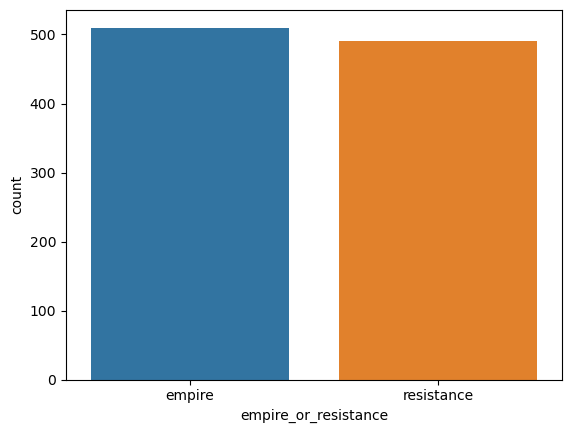

In [55]:
sns.barplot(x='empire_or_resistance', y='count', data=e_or_r_df)

In [65]:
X = data_frame[['homeworld', 'unit_type']]
y = data_frame['empire_or_resistance']
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   homeworld  1000 non-null   object
 1   unit_type  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [60]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

importances = model.feature_importances_
feature_importances = pd.DataFrame({'Features': X_encoded.columns, 'Importance': importances})

0.505


<Axes: xlabel='Features'>

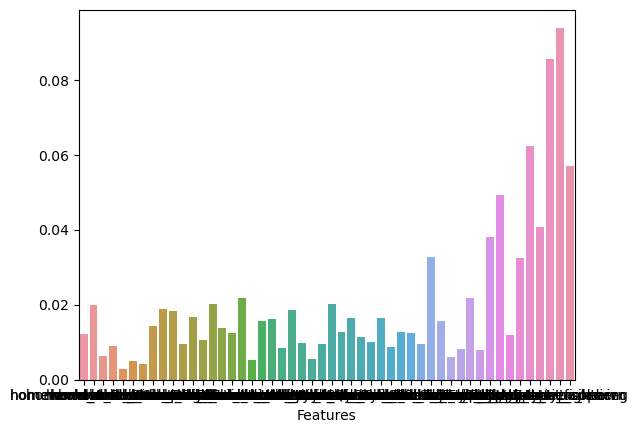

In [62]:
sns.barplot(x='Features', y=importances, data=feature_importances)

In [64]:
file_name = 'trained_model.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(model, file)